# Hierarchical clustering

In this lab we will implement hierarchical agglomerative clustering algorithms and apply them to **[Mall Customers dataset](https://www.kaggle.com/sivaram1987/mall-customers)** from Kaggle in order to find the best clustering of the customers.

The dataset contains records about 200 customers. For each customer there are 5 features:
1. CustomerID
2. Gender
3. Age
4. Annual Income
5. Spending Score

In our analysis we will use only the latter two features, i.e. **Annual Income** and **Spending Score**.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

We first prepare the dataset by reading from the file for every customer only the two features of interest.

只取 index 为 3, 4 这两列 特征

In [6]:
def load_data(fname):
    features = []
    
    with open(fname) as F:
        next(F) # skip the first line with feature names
        for line in F:
            p = line.strip().split(',')
            features.append(np.array(p[3:5], int))
    return np.array(features)

In [7]:
dataset = load_data("mall.csv")

print(dataset)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Exercise 1

1. Implement single-linkage agglomerative clustering
2. Implement complete-linkage agglomerative clustering
3. Implement group-average linkage agglomerative clustering

In each of the algorithms use the Euclidean distance as a dissimilarity measure between objects.

In [8]:
# 绘制散点图
def plot_clusters(clusters):
    for cluster in clusters:
        cluster = np.array(cluster)
        plt.scatter(cluster[:,0], cluster[:,1])
    plt.show()

In [9]:
# Implement single-linkage agglomerative clustering
def single_linkage_clustering(data, k):
    clusters = [[x] for x in data] # 首先, 每个数据点自成一个簇
    while len(clusters) > k: # 当簇的数量大于 k 时, 继续合并
        min_distance = math.inf # 初始化最小距离为无穷大
        min_i = -1
        min_j = -1
        for i in range(len(clusters)): # 遍历所有簇
            for j in range(i+1, len(clusters)): # 遍历所有簇
                for x in clusters[i]: # 遍历簇 i 中的所有数据点
                    for y in clusters[j]: # 遍历簇 j 中的所有数据点
                        distance = np.linalg.norm(x - y) # 计算数据点 x 和 y 之间的距离 (欧氏距离)
                        if distance < min_distance: # 如果距离小于当前最小距离
                            min_distance = distance
                            min_i = i
                            min_j = j
        clusters[min_i].extend(clusters[min_j]) # 将簇 j 中的所有数据点合并到簇 i 中
        del clusters[min_j] # 删除簇 j
    return clusters



In [10]:
# Implement complete-linkage agglomerative clustering
def complete_linkage_clustering(data, k):
    clusters = [[x] for x in data] # 首先, 每个数据点自成一个簇
    while len(clusters) > k: # 当簇的数量大于 k 时, 继续合并
        max_distance = -math.inf # 初始化最大距离为负无穷大
        max_i = -1
        max_j = -1
        for i in range(len(clusters)): # 遍历所有簇
            for j in range(i+1, len(clusters)): # 遍历所有簇
                for x in clusters[i]: # 遍历簇 i 中的所有数据点
                    for y in clusters[j]: # 遍历簇 j 中的所有数据点
                        distance = np.linalg.norm(x - y) # 计算数据点 x 和 y 之间的距离 (欧氏距离)
                        if distance > max_distance: # 如果距离大于当前最大距离
                            max_distance = distance
                            max_i = i
                            max_j = j
        clusters[max_i].extend(clusters[max_j]) # 将簇 j 中的所有数据点合并到簇 i 中
        del clusters[max_j] # 删除簇 j
    return clusters



In [11]:
# Implement group-average linkage agglomerative clustering
def group_average_linkage_clustering(data, k):
    clusters = [[x] for x in data] # 首先, 每个数据点自成一个簇
    while len(clusters) > k: # 当簇的数量大于 k 时, 继续合并
        min_distance = math.inf # 初始化最小距离为无穷大
        min_i = -1
        min_j = -1
        for i in range(len(clusters)): # 遍历所有簇
            for j in range(i+1, len(clusters)): # 遍历所有簇
                distance = 0
                for x in clusters[i]: # 遍历簇 i 中的所有数据点
                    for y in clusters[j]: # 遍历簇 j 中的所有数据点
                        distance += np.linalg.norm(x - y) # 计算数据点 x 和 y 之间的距离 (欧氏距离)
                distance /= len(clusters[i]) * len(clusters[j]) # 计算两个簇之间的平均距离
                if distance < min_distance: # 如果距离小于当前最小距离
                    min_distance = distance
                    min_i = i
                    min_j = j
        clusters[min_i].extend(clusters[min_j]) # 将簇 j 中的所有数据点合并到簇 i 中
        del clusters[min_j] # 删除簇 j
    return clusters



# Exercise 2

1. Cluster **Mall Customers** dataset using the implemented single-linkage agglomerative clustering

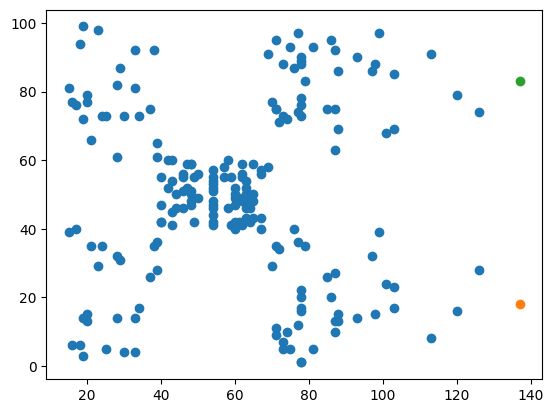

In [12]:
# 调用 single_linkage_clustering 函数进行聚类
clusters = single_linkage_clustering(dataset, 3)

# 绘制聚类结果
plot_clusters(clusters)

2. Cluster **Mall Customers** dataset using the implemented complete-linkage agglomerative clustering

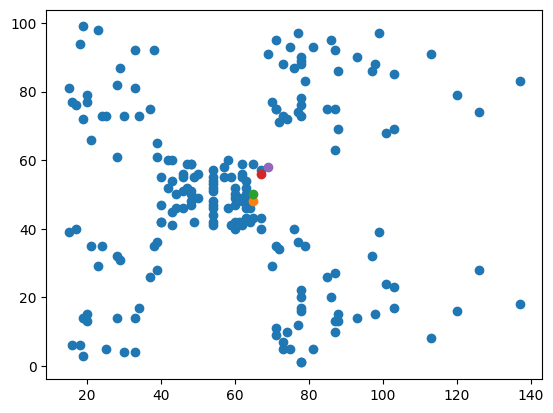

In [13]:
# 调用 complete_linkage_clustering 函数进行聚类
clusters = complete_linkage_clustering(dataset, 5)

# 绘制聚类结果
plot_clusters(clusters)

3. Cluster **Mall Customers** dataset using the implemented group-average linkage agglomerative clustering

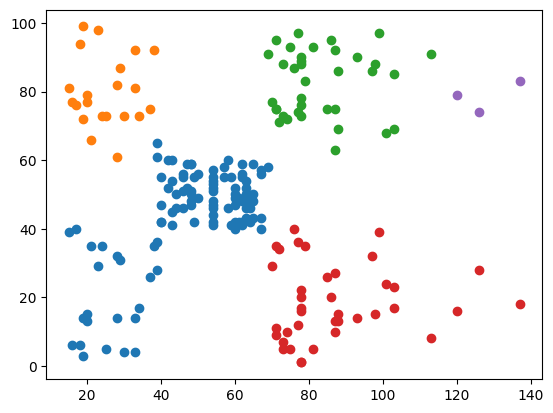

In [14]:
# 调用 group_average_linkage_clustering 函数进行聚类
clusters = group_average_linkage_clustering(dataset, 5)

# 绘制聚类结果
plot_clusters(clusters)

# Exercise 3

Implement Silhouette coefficient computation for a clustering

In [15]:
# Implement Silhouette coefficient computation for a clustering
def silhouette_coefficient(clusters):
    a = np.zeros(len(clusters))
    b = np.zeros(len(clusters))
    s = np.zeros(len(clusters))
    for i in range(len(clusters)):
        for x in clusters[i]:
            a[i] += np.linalg.norm(x - np.mean(clusters[i], axis=0))
        a[i] /= len(clusters[i])
    for i in range(len(clusters)):
        b[i] = math.inf
        for j in range(len(clusters)):
            if i != j:
                for x in clusters[i]:
                    b[i] = min(b[i], np.linalg.norm(x - np.mean(clusters[j], axis=0)))
    for i in range(len(clusters)):
        s[i] = (b[i] - a[i]) / max(a[i], b[i])
    return s


# Exercise 4

1. For each of the hierarchy of clusterings computed in Exercise 2: 
    - extract clusterings with the number of clusters k=2,3,4,...,20
    - for each of the extracted clusterings compute Silhouette coefficient and plot the values on a single plot

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (19,) + inhomogeneous part.

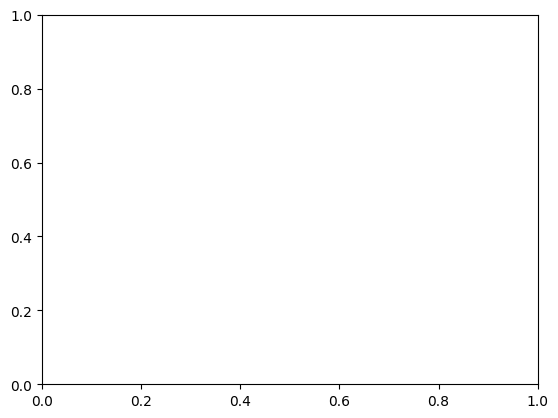

In [16]:
import matplotlib.pyplot as plt

k_values = range(2, 21)
silhouette_scores = []

for k in k_values:
    clusters = complete_linkage_clustering(dataset, k)
    silhouette_score = silhouette_coefficient(clusters)
    silhouette_scores.append(silhouette_score)

plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs Number of Clusters')
plt.show()


2. Which algorithm produced the best clustering and what is the number of clusters in this clustering?

# Exercise 5

Visualise the best clustering of the dataset from the previous exercise on a single plot by coloring different clusters by different colours.